**Draft 1** - June 11, 2019 <br />
Please note that this blog post may go through several iterations based on feedback from the community.

# Introduction

This blog post is my attempt at creating a clear understanding of what a matrix profile is and why you should care about it. The goal of the post is to only use visual aids and avoid using any math notation. I strongly believe that the matrix profile is a revolutionary approach to analyzing time series data and it should be presented in a way that everyone can understand its applications. Although I will not use any math notation, there will be some terminology thrown around.

# Terminology

This section is used to describe terminology used throughout the post.

<table align="left">
    <thead>
        <tr align="left">
            <th>Term</th>
            <th>Description</th>
        </tr>
    </thead>
<tbody>
<tr>
<td>Distance Profile</td>
<td>The distances of each subsequence in <a href="https://en.wikipedia.org/wiki/Euclidean_space" target="_blank">Euclidean space</a>.</td>
</tr>
<tr>
<td>1-NN Indices</td>
<td>The closest match to the particular subsequence. This is relative to the distance profile. For example, value 100 at index 0 is telling you that the closest match to the first subsequence is at index 100.</td>
</tr>
<tr>
<td>Matrix Profile</td>
<td>The combination of the distance profile and 1-NN indices.</td>
</tr>
<tr>
<td>Subsequence</td>
<td>A small snippet of the time series.</td>
</tr>
<tr>
<td>Window</td>
<td>The number of data points to include in a subsequence. If your time series is in seconds, a window size of 10 would be looking at 10 second intervals.</td>
</tr>
<tr>
<td>Motif</td>
<td>A time series specific term that shows a reoccurring pattern. For example, approaching the holidays in the United States retail sales go up.</td>
</tr>
<tr>
<td>Anomaly</td>
<td>An anomaly is something that shifts from a standard pattern. For example, a solar eclipse does not happen every day.</td>
</tr>
<tr>
<td>Discord</td>
<td>This is synonymous with anomaly, but a time series pattern mining specific term.</td>
</tr>
</tbody>
</table>

# Background

Computational analysis of large series was difficult due to hardware limitations.
In the past many algorithms use domain specific heuristics to make computation faster. MP is domain agnostic.
Other algorithms used a lot of memory - hashing.

# Examples

Analyzing a time series is generally a visual exercise. A domain expert reviews it and draws conclusions. An example that everyone should be familiar with is stocks. Anyone that ever looked at stock prices on a daily basis knows the importance of trends to determine if you should buy or sell. It is pretty easy to see a trend when you look at aggregated data on a daily, weekly, monthly or annual basis. However, some of the information is lost. What if you wanted to review the trends on a scale of milliseconds? It would be very difficult to visually inspect. Yes, you may come to the conclusion that there are trade bots out there, but bear with me.

TODO Plot stock trends...

In [1]:
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
import numpy as np

In [139]:
np.random.seed(66)

pattern = np.array([0.4, 0.5, 0.6, 0.7])
anomaly = np.array([2, 2.01, 2.01, 2])

toy_data = np.random.uniform(0, 0.01, 10)
toy_data = np.append(toy_data, pattern)
toy_data = np.append(toy_data, np.random.uniform(0, 0.01, 10))
toy_data = np.append(toy_data, pattern)
toy_data = np.append(toy_data, np.random.uniform(0, 0.01, 10))
toy_data = np.append(toy_data, pattern)
toy_data = np.append(toy_data, np.random.uniform(0, 0.01, 10))
toy_data = np.append(toy_data, anomaly)
toy_data = np.append(toy_data, np.random.uniform(0, 0.01, 10))

In [140]:
from matrixprofile import *

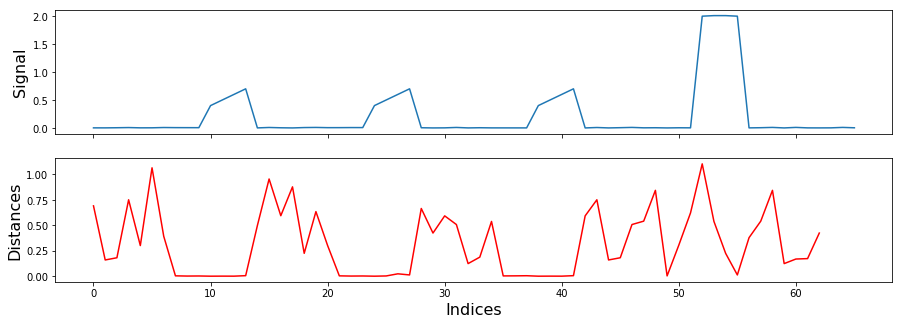

In [145]:
m = 4
mp = matrixProfile.stomp(toy_data, m)

#Append np.nan to Matrix profile to enable plotting against raw data
mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

#Plot the signal data
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(15,5))
ax1.plot(np.arange(len(toy_data)), toy_data)
ax1.set_ylabel('Signal', size=16)

#Plot the Matrix Profile
ax2.plot(np.arange(len(mp_adj)), mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Distances', size=16)
ax2.set_xlabel('Indices', size=16)
plt.show()